In [3]:
# matplotlib_fontjaをインストールしていなければ、下記を実施
# !pip install matplotlib_fontja

## Import

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_fontja

## データの作成

In [3]:
dogcat_df = pd.DataFrame([
    ["犬", 32.3],
    ["犬",25.4],
    ["犬",15.2],
    ["猫",10.1],
    ["犬",8.7],
    ["猫",7.5],
    ["犬",6.9],
    ["猫",4.8],
    ["猫",4.3],
    ["猫",3.2],
    ],columns = ["真の分類","体重"]
)

<Axes: xlabel='体重', ylabel='Count'>

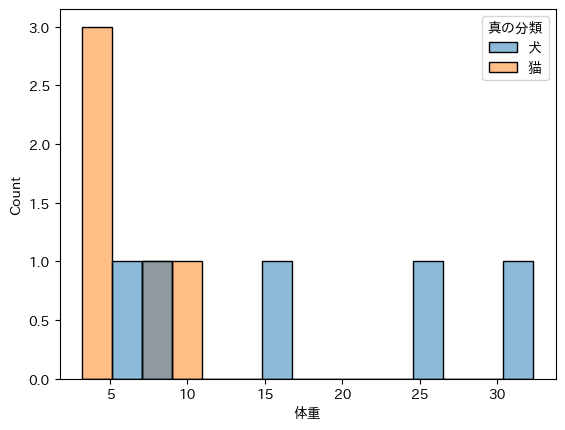

In [4]:
sns.histplot(data=dogcat_df, x='体重', hue='真の分類', bins=15)

In [5]:
# 犬を1に、猫を0に割り当てる
dogcat_df["実測値"] = dogcat_df["真の分類"].map({"犬":1,"猫":0})
# 予測値を体重が10より大きいときに1,それ以外の時に0とする
dogcat_df["予測値"] = (dogcat_df["体重"] > 10).astype(int)
# 予測値が1のとき犬、0のとき猫とする
dogcat_df["予測の分類"] = dogcat_df["予測値"].map({1:"犬",0:"猫"})
dogcat_df

,真の分類,体重,実測値,予測値,予測の分類
0,犬,32.3,1,1,犬
1,犬,25.4,1,1,犬
2,犬,15.2,1,1,犬
3,猫,10.1,0,1,犬
4,犬,8.7,1,0,猫
5,猫,7.5,0,0,猫
6,犬,6.9,1,0,猫
7,猫,4.8,0,0,猫
8,猫,4.3,0,0,猫
9,猫,3.2,0,0,猫


## 正解率と誤分類率

正解率や誤分類率を出すには、sklearn.metricsのaccuracy_scoreを使用する

In [6]:
# 実測値と予測値が同じ場合を正解とする
acc = accuracy_score(dogcat_df["実測値"], dogcat_df["予測値"])
print(f"正解率：{acc:.3f} 誤分類率:{1-acc:.3f}")

正解率：0.700 誤分類率:0.300


## 混同行列

crosstabでクロス集計が算出できる

In [7]:
pd.crosstab(dogcat_df["真の分類"], dogcat_df["予測の分類"])
# sklearnのconfusion_matrixを使用しても算出可能
# confusion_matrix(dogcat_df["実測値"], dogcat_df["予測値"])

予測の分類,犬,猫
真の分類,,
犬,3,2
猫,1,4


## 適合率、再現率

sklearn.metricsのprecision_scoreとrecall_scoreを使用する

In [8]:
precision = precision_score(dogcat_df["実測値"], dogcat_df["予測値"])
recall = recall_score(dogcat_df["実測値"], dogcat_df["予測値"])
print(f"適合率={precision}, 再現率={recall}")

適合率=0.75, 再現率=0.6


In [9]:
# tp, fn, fp, tnから算出できます
tp, fn, fp, tn = pd.crosstab(dogcat_df["真の分類"], dogcat_df["予測の分類"]).values.flatten()
print(f"適合率={tp / (tp + fp)}, 再現率={tp / (tp + fn)}")

適合率=0.75, 再現率=0.6


## ROC曲線の作成とAUCの算出(sklearn)

In [10]:
dogcat_df

,真の分類,体重,実測値,予測値,予測の分類
0,犬,32.3,1,1,犬
1,犬,25.4,1,1,犬
2,犬,15.2,1,1,犬
3,猫,10.1,0,1,犬
4,犬,8.7,1,0,猫
5,猫,7.5,0,0,猫
6,犬,6.9,1,0,猫
7,猫,4.8,0,0,猫
8,猫,4.3,0,0,猫
9,猫,3.2,0,0,猫


In [11]:
fpr_list, tpr_list, thresholds = roc_curve(dogcat_df["実測値"], dogcat_df["体重"])
print("FPR（偽陽性率）:", fpr_list)
print("TPR（真陽性率）:", tpr_list)
print("閾値          ：", thresholds)

FPR（偽陽性率）: [0.  0.  0.  0.2 0.2 0.4 0.4 1. ]
TPR（真陽性率）: [0.  0.2 0.6 0.6 0.8 0.8 1.  1. ]
閾値          ： [ inf 32.3 15.2 10.1  8.7  7.5  6.9  3.2]


## AUCの算出(sklearn)

In [12]:
# AUCはsklearn.metricsのroc_auc_scoreから算出可能
auc = roc_auc_score(dogcat_df["実測値"],dogcat_df["体重"])
print(f"auc_score: {auc:.3f}")

auc_score: 0.880


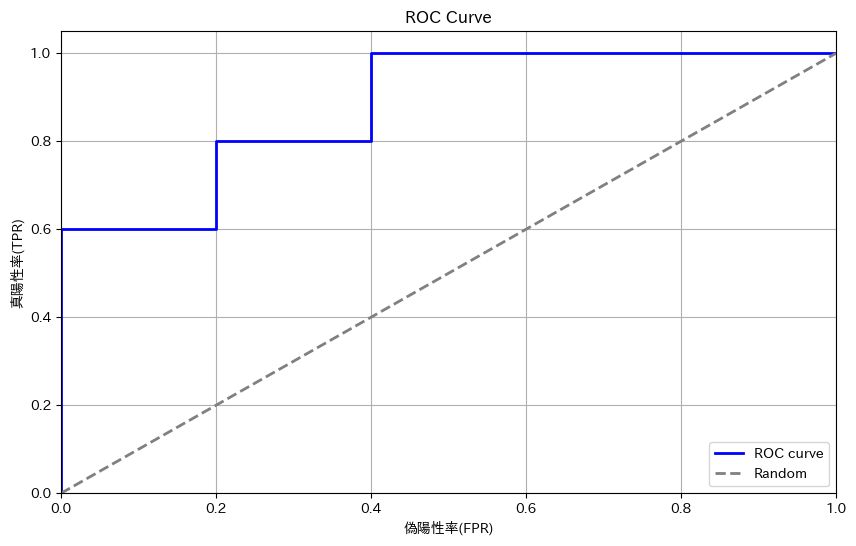

In [13]:
# ROC曲線のプロット
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, color='blue', lw=2, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label=f'Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('偽陽性率(FPR)')
plt.ylabel('真陽性率(TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## 参考：ROC曲線の導出(sklearnのメソッドを使わずに)

ROC曲線やAUCの計算を理解してもらうために、sklearnのメソッドを使用せずに求める方法も解説します。

In [14]:
dogcat_df

,真の分類,体重,実測値,予測値,予測の分類
0,犬,32.3,1,1,犬
1,犬,25.4,1,1,犬
2,犬,15.2,1,1,犬
3,猫,10.1,0,1,犬
4,犬,8.7,1,0,猫
5,猫,7.5,0,0,猫
6,犬,6.9,1,0,猫
7,猫,4.8,0,0,猫
8,猫,4.3,0,0,猫
9,猫,3.2,0,0,猫


In [15]:
tpr_list = []
fpr_list = []
# 閾値のリストを作成
thresholds = dogcat_df["体重"].values.tolist()
# 最初に「1の予測がない」状態を入れるため、体重の最大値に+1した値をthresholdsに挿入
thresholds = [dogcat_df["体重"].max()+1] + thresholds

# thresholdsごとにTPRとFPRを計算
roc_list = []
for threshold in thresholds:
    y_pred = (dogcat_df["体重"] >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(dogcat_df["実測値"], y_pred).flatten()

    # 真陽性率 (TPR)
    tpr = tp / (tp + fn)
    tpr_list.append(tpr)

    # 偽陽性率 (FPR)
    fpr = fp / (fp + tn)
    fpr_list.append(fpr)

    roc_list.append([threshold,tp,fp,tpr,fpr])
pd.DataFrame(roc_list,columns=["threshold","TP","FP","TPR","FPR"])

,threshold,TP,FP,TPR,FPR
0,33.3,0,0,0.0,0.0
1,32.3,1,0,0.2,0.0
2,25.4,2,0,0.4,0.0
3,15.2,3,0,0.6,0.0
4,10.1,3,1,0.6,0.2
5,8.7,4,1,0.8,0.2
6,7.5,4,2,0.8,0.4
7,6.9,5,2,1.0,0.4
8,4.8,5,3,1.0,0.6
9,4.3,5,4,1.0,0.8


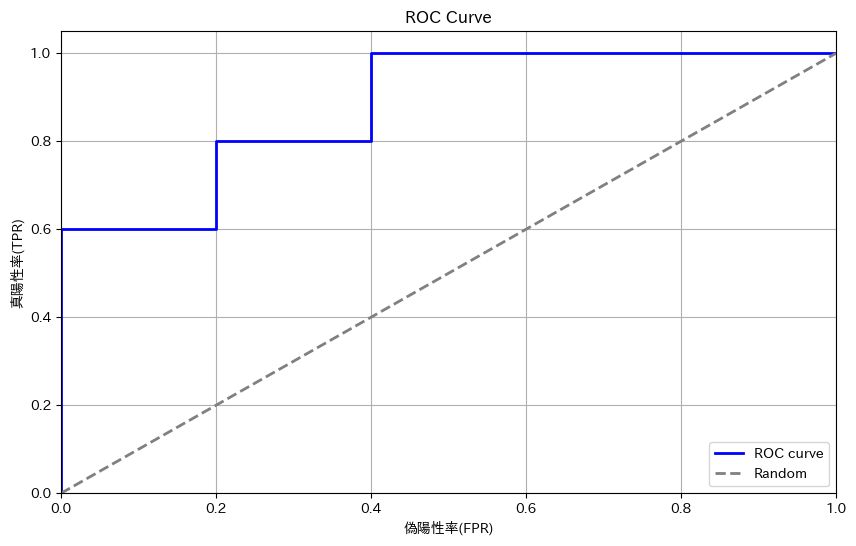

In [16]:
# ROC曲線のプロット
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, color='blue', lw=2, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label=f'Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('偽陽性率(FPR)')
plt.ylabel('真陽性率(TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## 参考：AUCの算出

予測値が重複する(ROC曲線上の点が斜めに移動する)可能性は考慮しなくてよい

上図のFPR, TPRの図から、下側の面積を算出する.  
Xが右に進んだときにXの差分とYをかけて長方形を算出し、これを合計する.

In [17]:
# Xにfpr, Yにtprを入れる.
roc_df = pd.DataFrame({
    "X":fpr_list,
    "Y":tpr_list
})
# X_shiftでXの一つ前のレコードを求め、X_diffにその差分を格納. 一番上の値に0を入れるため、fillnaを追加.
roc_df["X_shift"] = (roc_df["X"].shift(1)).fillna(0)
roc_df["X_diff"] = roc_df["X"] - roc_df["X_shift"]
roc_df

,X,Y,X_shift,X_diff
0,0.0,0.0,0.0,0.0
1,0.0,0.2,0.0,0.0
2,0.0,0.4,0.0,0.0
3,0.0,0.6,0.0,0.0
4,0.2,0.6,0.0,0.2
5,0.2,0.8,0.2,0.0
6,0.4,0.8,0.2,0.2
7,0.4,1.0,0.4,0.0
8,0.6,1.0,0.4,0.2
9,0.8,1.0,0.6,0.2


In [18]:
# X_diffはX方向に進んだ差分なので、高さであるYをかけて合計する.これがAUCとなる.
auc_score = (roc_df["Y"] * roc_df["X_diff"]).sum()
print(f"auc_score: {auc_score:.3f}")

auc_score: 0.880
